In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("/content/Churn_Modelling.csv")
data.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

Mean:  650.5288
Median:  652.0


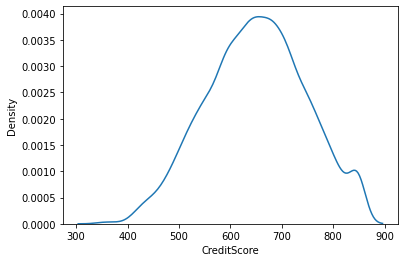

In [ ]:
#Univariate Analysis
#mean
print("Mean: ",data['CreditScore'].mean())
#median
print("Median: ",data['CreditScore'].median())

sns.kdeplot(data['CreditScore'])




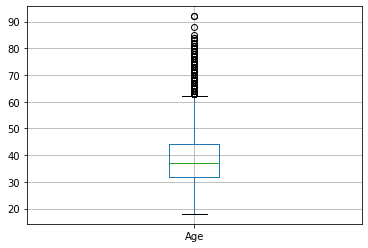

In [ ]:
data.boxplot(column=['Age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56724b8310>]],
      dtype=object)

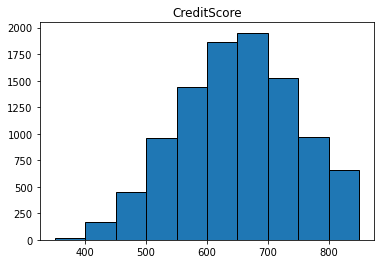

In [ ]:
data.hist(column='CreditScore',grid=False,edgecolor='black')

Text(0, 0.5, 'Has CrCard')

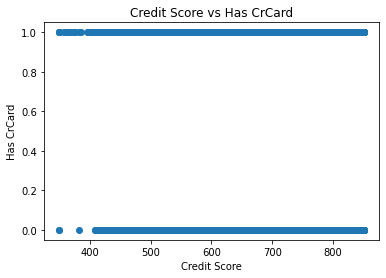

In [ ]:
#Bivariate Analysis
#scatter
plt.scatter(data.CreditScore,data.HasCrCard)
plt.title("Credit Score vs Has CrCard")
plt.xlabel("Credit Score")
plt.ylabel("Has CrCard")



In [ ]:
#corelation coefficient
data.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [ ]:
import statsmodels.api as sm
y=data['Age']
x=data[['EstimatedSalary']]
x=sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5185
Date:                Wed, 28 Sep 2022   Prob (F-statistic):              0.472
Time:                        23:40:16   Log-Likelihood:                -37691.
No. Observations:               10000   AIC:                         7.539e+04
Df Residuals:                    9998   BIC:                         7.540e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              39.0532      0.211    1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
data.loc[:,'Age':'EstimatedSalary']

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,42,2,0.00,1,1,1,101348.88
1,41,1,83807.86,1,0,1,112542.58
2,42,8,159660.80,3,1,0,113931.57
3,39,1,0.00,2,0,0,93826.63
4,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...
9995,39,5,0.00,2,1,0,96270.64
9996,35,10,57369.61,1,1,1,101699.77
9997,36,7,0.00,1,0,1,42085.58
9998,42,3,75075.31,2,1,0,92888.52


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  


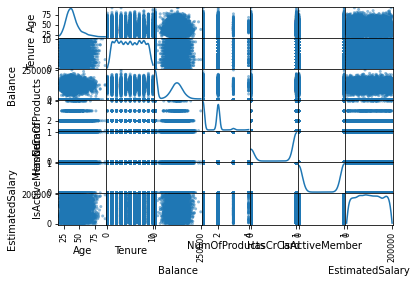

In [ ]:
pd.plotting.scatter_matrix(data.loc[:, "Age":"EstimatedSalary"], diagonal="kde")
plt.tight_layout()
plt.show()

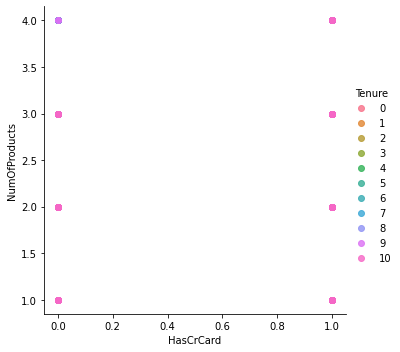

In [ ]:
sns.lmplot("HasCrCard", "NumOfProducts", data, hue="Tenure", fit_reg=False);

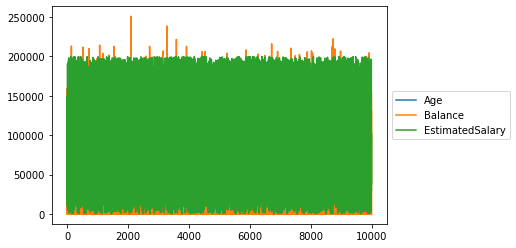

In [ ]:
ax = data[["Age","Balance","EstimatedSalary"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
print(data.sum())

RowNumber                                                   50005000
CustomerId                                              156909405694
Surname            HargraveHillOnioBoniMitchellChuBartlettObinnaH...
CreditScore                                                  6505288
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                           389218
Tenure                                                         50128
Balance                                                 764858892.88
NumOfProducts                                                  15302
HasCrCard                                                       7055
IsActiveMember                                                  5151
EstimatedSalary                                        1000902398.81
Exited                                                          2037
dtype: object


In [ ]:
print(data.sum(1))

0       15736618.88
1       15844315.44
2       15893456.37
3       15795925.63
4       15943385.92
           ...     
9995    15713313.64
9996    15739522.38
9997    15637370.58
9998    15861138.83
9999    15807478.57
Length: 10000, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
print(data.mean())

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
#Missing values
data.isnull().sum().sum()

0

In [ ]:
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib._pylab_helpers
z=np.abs(stats.zscore(data['Age']))
print(z)

0       0.293517
1       0.198164
2       0.293517
3       0.007457
4       0.388871
          ...   
9995    0.007457
9996    0.373958
9997    0.278604
9998    0.293517
9999    1.041433
Name: Age, Length: 10000, dtype: float64


In [ ]:
print(np.where(z>1))

(array([   6,    9,   11, ..., 9991, 9993, 9999]),)


In [ ]:
data1=data[(z>1)]
data2=data.drop(data1['Age'],inplace=True)


In [ ]:
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [ ]:
print(data.shape)

(9951, 14)


In [ ]:
cat=pd.Categorical(data['Surname'])
print(cat)

['Hargrave', 'Hill', 'Onio', 'Boni', 'Mitchell', ..., 'Obijiaku', 'Johnstone', 'Liu', 'Sabbatini', 'Walker']
Length: 9951
Categories (2920, object): ['Abazu', 'Abbie', 'Abbott', 'Abdullah', ..., 'Zubareva', 'Zuev', 'Zuyev',
                            'Zuyeva']


In [ ]:
print(data['Surname'])

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 9951, dtype: object


In [ ]:
data2=data
print(data2)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [ ]:
scale={"Female":1,
       "Male":2}
data2["Gender"]=data2["Gender"].replace(scale)

In [ ]:
scaleC={"France":1,
        "Spain":2,
        "Germany":3}
data2["Geography"]=data2["Geography"].replace(scaleC)

In [ ]:
from sklearn.preprocessing import LabelBinarizer,MultiLabelBinarizer

name=data2['Surname']
label=LabelBinarizer()
label.fit_transform(name)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
data2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,0,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,0,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,0,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,0,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,0,771,1,2,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,0,516,1,2,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,0,709,1,1,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,0,772,3,2,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
x=data2.iloc[:,:-1].values
print(x)

[[1.0000000e+00 1.5634602e+07 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [2.0000000e+00 1.5647311e+07 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [3.0000000e+00 1.5619304e+07 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [9.9980000e+03 1.5584532e+07 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [9.9990000e+03 1.5682355e+07 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+04 1.5628319e+07 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [ ]:
y=data2.iloc[:,-1].values
print(y)

[1 0 1 ... 1 1 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
print(scaler.fit_transform(data2))

[[-1.74869656 -0.78307632 -0.01417834 ...  0.96961037  0.0219574
   1.97534059]
 [-1.74834848 -0.60639208 -0.01417834 ...  0.96961037  0.21660042
  -0.50624181]
 [-1.7480004  -0.99575361 -0.01417834 ... -1.0313421   0.24075304
   1.97534059]
 ...
 [ 1.73106248 -1.47916416 -0.01417834 ...  0.96961037 -1.00854975
   1.97534059]
 [ 1.73141056 -0.1192001  -0.01417834 ... -1.0313421  -0.12515661
   1.97534059]
 [ 1.73175865 -0.87042443 -0.01417834 ... -1.0313421  -1.07627496
  -0.50624181]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [ ]:
x_train

array([[7.6230000e+03, 1.5796413e+07, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.9532574e+05],
       [2.4600000e+02, 1.5797219e+07, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.3195323e+05],
       [9.6090000e+03, 1.5638247e+07, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.4228765e+05],
       ...,
       [3.3140000e+03, 1.5638988e+07, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 9.4888600e+04],
       [9.8950000e+03, 1.5704795e+07, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 4.9054100e+04],
       [2.7820000e+03, 1.5641416e+07, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.5752760e+05]])

In [ ]:
y_train

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
x_test

array([[9.0490000e+03, 1.5640855e+07, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.0339608e+05],
       [2.0280000e+03, 1.5606613e+07, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 8.8958490e+04],
       [5.1570000e+03, 1.5675256e+07, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.2178930e+05],
       ...,
       [2.2180000e+03, 1.5610337e+07, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.7501512e+05],
       [1.7500000e+02, 1.5625524e+07, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.4645783e+05],
       [4.7610000e+03, 1.5713949e+07, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.7418344e+05]])

In [ ]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,